## Student Id: 24045464

# Part 2

### Task 6 - Explore the dataset to identify an "interesting" pattern or trend

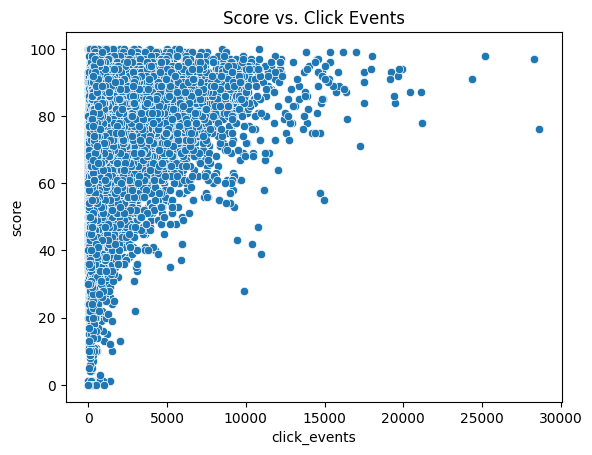

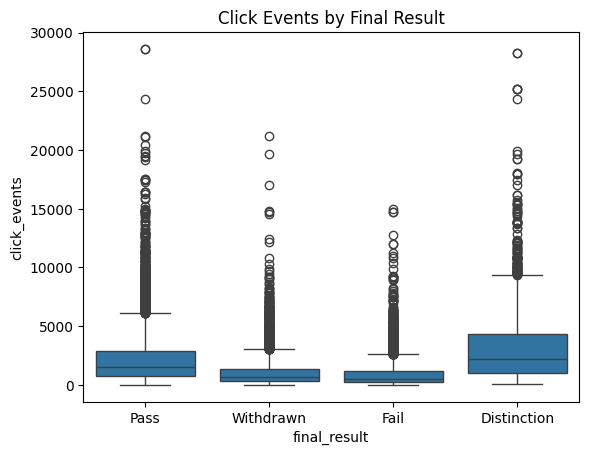

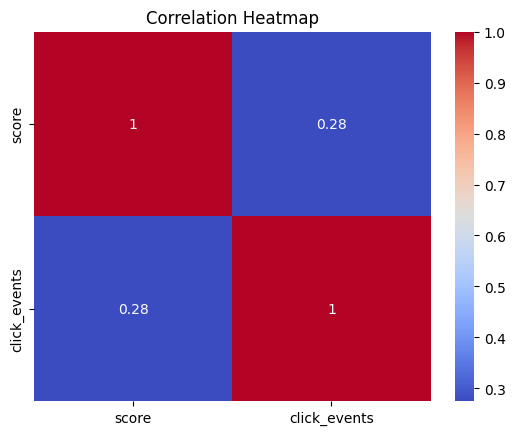

In [12]:
#importing modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, pearsonr

# we load the datasets
part_2a = pd.read_csv("part_2a.csv")
part_2b = pd.read_csv("part_2b.csv")

# we make one single data frame for ease
dataPart2 = pd.merge(part_2a, part_2b, on="id_student")

# first we wanna see if number of clicks can predict the score of students
sns.scatterplot(data=dataPart2, x="click_events", y="score")
plt.title("Score vs. Click Events")
plt.show()

# we futher investigate this by making a box plot for click numbers and final result
sns.boxplot(data=dataPart2, x="final_result", y="click_events")
plt.title("Click Events by Final Result")
plt.show()

# we can use headmap to see how much this correlation is
numericData = dataPart2.select_dtypes(include=['number']).dropna().drop(columns=['id_student']).loc[:, ~dataPart2.select_dtypes(include=['number']).drop(columns=['id_student']).columns.str.contains('^Unnamed')] # we remove irrelevant columns
sns.heatmap(numericData.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Task 7 - Detect and remove any outliers in the data used for your "interesting" pattern or trend

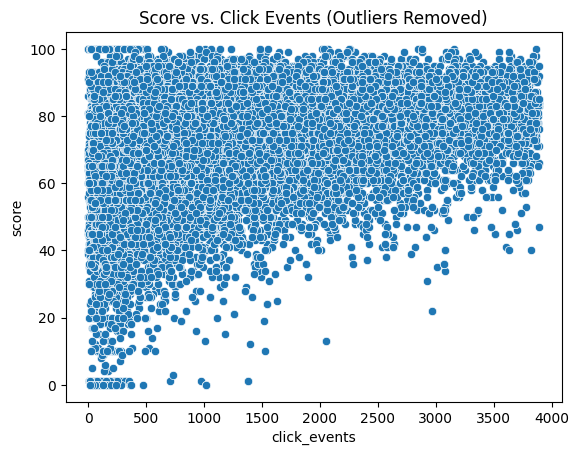

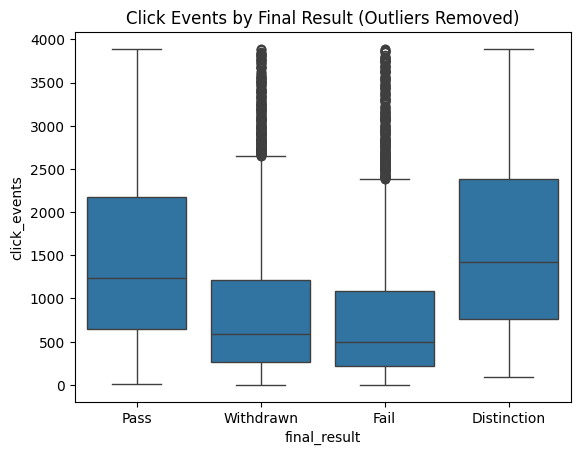

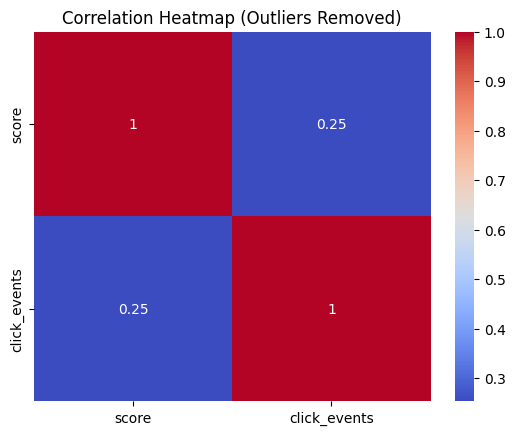

Rows before filtering: 26721
Rows after filtering: 22270
Rows filtered 4451


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


# we can remove outliers using both z-score and IQR. Other ways can also be implemented

# We define a function to remove outliers using z-score
def removeOutliersZScore(dataFrame, column, threshold=1):
    cleanedData = dataFrame.dropna(subset=[column])
    z_scores = zscore(cleanedData[column])
    return cleanedData[abs(z_scores) < threshold]

# We define a function to remove outliers using IQR
def removeOutliersIQR(dataFrame, column):
    Q1 = dataFrame[column].quantile(0.25)
    Q3 = dataFrame[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataFrame[(dataFrame[column] >= lower_bound) & (dataFrame[column] <= upper_bound)]

# Choose method
method = "zscore"  # Change to "iqr" or "zscore"
if method == "zscore":
    dataCleaned = removeOutliersZScore(dataPart2, 'click_events')
elif method == "iqr":
    dataCleaned = removeOutliersIQR(dataPart2, 'click_events')

# Scatter plot
sns.scatterplot(data=dataCleaned, x="click_events", y="score")
plt.title("Score vs. Click Events (Outliers Removed)")
plt.show()

# Boxplot
sns.boxplot(data=dataCleaned, x="final_result", y="click_events")
plt.title("Click Events by Final Result (Outliers Removed)")
plt.show()

# Headmap
numericDataCleaned = dataCleaned.select_dtypes(include=['number']).dropna().drop(columns=['id_student']).loc[:, ~dataPart2.select_dtypes(include=['number']).drop(columns=['id_student']).columns.str.contains('^Unnamed')]
sns.heatmap(numericDataCleaned.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Outliers Removed)")
plt.show()


print("Rows before filtering:", len(dataPart2))
print("Rows after filtering:", len(dataCleaned))
print("Rows filtered", len(dataPart2)- len(dataCleaned))

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Task 8 - Define a hypothesis to test your “interesting” pattern or trend an test your hypothesis with statistical significance level of 0.05

In [14]:
# replace with your code

# H0: Our null hypothesis says that there is not correlation between number of clicks and scores.

from scipy.stats import pearsonr

# Variables
click_events = numericDataCleaned['click_events']
scores = numericDataCleaned['score']

# The test
correlation_coefficient, p_value = pearsonr(click_events, scores)

# Results
print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis (H₀). There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis (H₀). No significant correlation.")


Correlation Coefficient: 0.25335280587884224
P-value: 6e-323
Reject the null hypothesis (H₀). There is a significant correlation.


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>